In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
%pip install geopandas --upgrade --quiet
%pip install plotly --upgrade --quiet
%pip install scikit-learn --upgrade --quiet
import geopandas as gpd
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



<ul style="list-style-type:none; text-align: center;">
    <li style="font-size:36px;"> <b>Data Cleaning and Preparation</b></li>
</ul>

<p></p>
<p style="font-size:20px;"> <b>Dengue Data</b>

In [2]:
#import dengue data
dengue_filepath = '/Users/pranav/Documents/Dengue vs Covid/Dengue_related_data copy.csv'
dengue = pd.read_csv(dengue_filepath, sep = ',', header =0)

#Create copy of dengue data
dengue_data = dengue.copy()

#Drop dengue incidence columns
dengue_data.drop(dengue_data.iloc[:,19:30], axis= 1, inplace = True)
dengue_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sector_ID   1261 non-null   object 
 1   ROAD_NAME   1261 non-null   object 
 2   PremType    1261 non-null   object 
 3   NDVI_A      1261 non-null   float64
 4   300m-P      670 non-null    float64
 5   500m_P      920 non-null    float64
 6   V_Density   693 non-null    float64
 7   A_HDB_H     854 non-null    float64
 8   A_HDB_A     854 non-null    float64
 9   a_HDB_P     846 non-null    float64
 10  D_To_Drain  1261 non-null   float64
 11  length_D    309 non-null    float64
 12  Forest_P    92 non-null     float64
 13  Grass_P     220 non-null    float64
 14  MVege_P     693 non-null    float64
 15  Building_P  1260 non-null   float64
 16  Condo_n     247 non-null    float64
 17  Landed_n    413 non-null    float64
 18  HDB_RU      854 non-null    float64
dtypes: float64(16), object(3)
m

In [3]:

#Drop ROAD_NAME column
dengue_data.drop(columns = ['ROAD_NAME'], inplace = True)

#Use imputer to change NaN values to 0
from sklearn.impute import SimpleImputer
Imputer = SimpleImputer(strategy = 'constant', fill_value=0)
master_data = pd.DataFrame(Imputer.fit_transform(dengue_data))

#Imputation removed column names; put them back 
master_data.columns = dengue_data.columns
master_data = master_data.infer_objects()
# Define function to map presence of drain
def drain(row):
    if row.length_D > 0 :
        return "Present"
    else:
        return "Absent" 
    
# Create drain presence column
master_data['Drain_P'] = master_data.apply(drain, axis= 'columns')


In [4]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sector_ID   1261 non-null   object 
 1   PremType    1261 non-null   object 
 2   NDVI_A      1261 non-null   float64
 3   300m-P      1261 non-null   float64
 4   500m_P      1261 non-null   float64
 5   V_Density   1261 non-null   float64
 6   A_HDB_H     1261 non-null   float64
 7   A_HDB_A     1261 non-null   float64
 8   a_HDB_P     1261 non-null   float64
 9   D_To_Drain  1261 non-null   float64
 10  length_D    1261 non-null   float64
 11  Forest_P    1261 non-null   float64
 12  Grass_P     1261 non-null   float64
 13  MVege_P     1261 non-null   float64
 14  Building_P  1261 non-null   float64
 15  Condo_n     1261 non-null   float64
 16  Landed_n    1261 non-null   float64
 17  HDB_RU      1261 non-null   float64
 18  Drain_P     1261 non-null   object 
dtypes: float64(16), object(3)
m

In [5]:
#import case count data
case_counts_filepath = '/Users/pranav/Documents/Dengue vs Covid/2007-2020 Case counts.csv'
case_counts_data = pd.read_csv(case_counts_filepath, sep = ',', header =0)
case_counts_data

,Sector_ID,Case_count_2007,Case_count_2008,Case_count_2009,Case_count_2010,Case_count_2011,Case_count_2012,Case_count_2013,Case_count_2014,Case_count_2015,Case_count_2016,Case_count_2017,Case_count_2018,Case_count_2019,Case_count_2020
0,CO433,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,CO1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,CO2,0,0,0,2,0,0,1,0,0,0,0,0,0,10
3,CO3,0,0,0,0,0,0,0,0,2,0,0,0,0,0
4,CO4,0,0,0,2,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,FL79b,0,0,0,0,0,0,2,2,0,0,0,0,0,3
1257,FL845,0,0,0,0,0,0,0,0,0,0,1,0,0,48
1258,FL846,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1259,FL847,0,0,0,0,0,0,0,0,0,0,0,1,12,0


In [6]:
#import location data
location_filepath = '/Users/pranav/Documents/Dengue vs Covid/Wolbachia.csv'
location_data = pd.read_csv(location_filepath, sep = ',', header =0)
location_data.rename(columns = {'Sector ID' :'Sector_ID'}, inplace = True)
location_data.drop_duplicates(subset = 'Sector_ID',inplace=True)
location_data

,Sector_ID,Location
0,CO1,None
1,CO2,None
2,CO3,None
3,CO4,None
4,CO5,None
...,...,...
1268,FL610,Yishun
1269,FL613,Yishun
1270,FL618,Yishun
1271,FL747,Yishun


In [7]:
#Merge 
first_combine = master_data.merge(case_counts_data, left_on = 'Sector_ID', right_on = 'Sector_ID', how = 'inner')
combined_master_data = first_combine.merge(location_data, left_on = 'Sector_ID', right_on = 'Sector_ID', how = 'inner')
combined_master_data



,Sector_ID,PremType,NDVI_A,300m-P,500m_P,V_Density,A_HDB_H,A_HDB_A,a_HDB_P,D_To_Drain,...,Case_count_2012,Case_count_2013,Case_count_2014,Case_count_2015,Case_count_2016,Case_count_2017,Case_count_2018,Case_count_2019,Case_count_2020,Location
0,CO433,Landed,0.39,0.00,0.12,0.01,0.00,0.00,0.0,612.56,...,0,0,0,0,0,0,0,0,0,None
1,CO1,Landed,0.37,0.16,0.64,0.04,0.00,0.00,0.0,388.23,...,0,0,0,0,0,0,0,0,0,None
2,CO2,Landed,0.37,0.00,0.00,0.00,0.00,0.00,0.0,318.49,...,0,1,0,0,0,0,0,0,10,None
3,CO3,Landed,0.33,0.00,0.20,0.01,0.00,0.00,0.0,148.34,...,0,0,0,2,0,0,0,0,0,None
4,CO4,Landed,0.46,0.60,0.87,0.85,0.00,0.00,0.0,111.95,...,0,0,0,0,0,0,0,0,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,FL79b,HDB,0.30,0.00,0.00,0.00,34.50,37.25,502275.7,223.17,...,0,2,2,0,0,0,0,0,3,None
1255,FL845,HDB,0.26,0.44,1.00,0.06,90.33,0.78,1958268.5,84.87,...,0,0,0,0,0,1,0,0,48,None
1256,FL846,HDB,0.26,0.79,1.00,0.00,38.00,0.67,426132.2,62.55,...,0,0,0,0,0,1,0,0,0,RCT_int_BedokNorthRd
1257,FL847,HDB,0.26,0.30,1.00,0.00,46.13,0.88,426132.2,348.57,...,0,0,0,0,0,0,1,12,0,None



<ul style="list-style-type:none; text-align: center;">
    <li style="font-size:36px;"> <b>Dataframe Creation</b></li>
</ul>

<p></p>
<p style="font-size:20px;"> <b>Functions</b>

In [8]:
#Function to classify current year case counts into risk groups 
def riskgroup(row):
    if row.RankPerct <= 1 and row.RankPerct > 0.75:
        return 3
    elif row.RankPerct <= 0.75 and row.RankPerct > 0.5:
        return 2 
    elif row.RankPerct <= 0.5 and row.RankPerct > 0.25:
        return 1
    else:
        return 0

#Functions to account for Wolbachia interventions
def wolb2020(row):
    if row.Location == 'Tampines' or row.Location == 'Yishun' or row.Location == 'CCK/KH' or row.Location == 'HKN':
        return 'Yes'
    else:
        return 'No'

def wolb2019_2018(row):
    if row.Location == 'Tampines' or row.Location == 'Yishun':
        return 'Yes'
    else:
        return 'No'

<p></p>
<p style="font-size:20px;"> <b>Individual Year DataFrames</b>

In [9]:
# Create DataFrames for each year (2008-2020)
prevyear_counts = ['Case_count_2007','Case_count_2008', 'Case_count_2009', 'Case_count_2010', 'Case_count_2011', 
                   'Case_count_2012', 'Case_count_2013', 'Case_count_2014', 'Case_count_2015', 'Case_count_2016', 
                   'Case_count_2017', 'Case_count_2018', 'Case_count_2019']
case_counts = ['Case_count_2008', 'Case_count_2009', 'Case_count_2010', 'Case_count_2011', 'Case_count_2012',
                'Case_count_2013', 'Case_count_2014', 'Case_count_2015', 'Case_count_2016', 'Case_count_2017', 
                'Case_count_2018', 'Case_count_2019', 'Case_count_2020']
names = ['2008','2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
DataFrame = {}

#Run for loop 
for prevyear, casecount, name in zip(prevyear_counts,case_counts,names):
    DataFrame[name] = combined_master_data[['Sector_ID', 'PremType', 'NDVI_A', '300m-P', '500m_P', 'V_Density','A_HDB_H', 'A_HDB_A',
                                             'a_HDB_P', 'D_To_Drain', 'length_D', 'Forest_P','Grass_P', 'MVege_P', 'Building_P', 'Condo_n', 'Landed_n', 'HDB_RU','Drain_P','Location',prevyear,casecount]].copy()
    DataFrame[name].rename(columns = {prevyear : 'PrevYear_count' , casecount : 'CurrentYear_count'}, inplace = True)
    DataFrame[name]['RankPerct'] = DataFrame[name]['CurrentYear_count'].rank(pct = True)
    if name == '2020':
        DataFrame[name]['Wolb_Q1'] = DataFrame[name].apply(wolb2020, axis= 'columns')
        DataFrame[name]['Wolb_Q2'] = DataFrame[name].apply(wolb2020, axis = 'columns')
    elif name == '2019':
        DataFrame[name]['Wolb_Q1'] = DataFrame[name].apply(wolb2019_2018, axis = 'columns')
        DataFrame[name]['Wolb_Q2'] = DataFrame[name].apply(wolb2019_2018, axis = 'columns')
    elif name == '2018':
        DataFrame[name]['Wolb_Q1'] = 'No'
        DataFrame[name]['Wolb_Q2'] = DataFrame[name].apply(wolb2019_2018, axis = 'columns')
    else:
        DataFrame[name]['Wolb_Q1'] = 'No'
        DataFrame[name]['Wolb_Q2'] = 'No'
    
    DataFrame[name]['RiskGroup'] = DataFrame[name].apply(riskgroup, axis = 'columns')

        
        

In [10]:
# Split DataFrames into Landed and HDB DataFrames
HDB = {}
Landed = {}

for name in names:
    HDB[name] = DataFrame[name][DataFrame[name]['PremType'] == 'HDB'].copy()
    Landed[name] = DataFrame[name][DataFrame[name]['PremType'] == 'Landed'].copy()
    Landed[name].drop(columns = ['A_HDB_H', 'A_HDB_A', 'a_HDB_P'], inplace = True)

<p></p>
<p style="font-size:20px;"> <b>Aggregated DataFrames</b>

In [11]:
#Concat DataFrames from 2008-2019 for training set
Aggregated_df = pd.concat([DataFrame['2008'], DataFrame['2009'],DataFrame['2010'], DataFrame['2011'], DataFrame['2012'], 
                           DataFrame['2013'], DataFrame['2014'], DataFrame['2015'], DataFrame['2016'], DataFrame['2017'],
                             DataFrame['2018'], DataFrame['2019']], axis = 0)

#Split into Landed and HDB DataFrames
AggLanded_df = Aggregated_df[Aggregated_df['PremType'] == 'Landed'].copy()
AggLanded_df.drop(columns = ['A_HDB_H', 'A_HDB_A', 'a_HDB_P'], inplace = True)

AggHDB_df = Aggregated_df[Aggregated_df['PremType'] == 'HDB'].copy()


<ul style="list-style-type:none; text-align: center;">
    <li style="font-size:36px;"> <b>Modelling</b></li>
</ul>

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
%pip install xgboost --upgrade --quiet
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier


# Set up input and target columns
landed_input_cols = ['NDVI_A', '300m-P', '500m_P', 'V_Density','D_To_Drain', 'length_D', 'Forest_P', 'Grass_P', 'MVege_P',
                     'Building_P', 'Condo_n', 'Landed_n', 'HDB_RU', 'Drain_P','PrevYear_count','Wolb_Q1', 'Wolb_Q2']

hdb_input_cols = ['NDVI_A', '300m-P', '500m_P', 'V_Density','A_HDB_H', 'A_HDB_A', 'a_HDB_P', 'D_To_Drain', 'length_D',
                   'Forest_P','Grass_P', 'MVege_P', 'Building_P', 'Condo_n', 'Landed_n', 'HDB_RU','Drain_P', 'PrevYear_count','Wolb_Q1', 'Wolb_Q2']

target_col = 'CurrentYear_count'

#Set up preprocessing steps
numerical_transformer = MinMaxScaler()
encoder = OneHotEncoder(sparse_output= False, categories = 'auto')



Note: you may need to restart the kernel to use updated packages.


<p></p>
<p style="font-size:20px;"> <b> Train 2008-2019; Test 2020</b>

In [13]:
# Landed Model
landed_input_df = AggLanded_df[landed_input_cols].copy()

# Splitting into test and train
landedX_train, landedX_test , landedy_train, landedy_test = landed_input_df, Landed['2020'][landed_input_cols], AggLanded_df[target_col], Landed['2020'][target_col]

# Build column transformer; Scale numeric data and encode categorical data
numeric_cols = landed_input_df.select_dtypes(include = ['int64','float64']).columns.tolist()
categorical_cols = landed_input_df.select_dtypes('object').columns.tolist()
preprocessor = ColumnTransformer(
    transformers = [
    ('num', numerical_transformer, numeric_cols),
    ('cat', encoder, categorical_cols)
    ]
)


#Select models for Regression
estimators = [
    RandomForestRegressor(random_state=0, n_estimators=1000)]



#Loop through models 
for estimator in estimators:
    steps = [
        ('preprocess', preprocessor),
        ('model', estimator)
    ]
    pipeline = Pipeline(steps)
    pipeline.fit(landedX_train, landedy_train)
    preds = pipeline.predict(landedX_test)
    print(estimator)
    print('Model Score : %.3f' % pipeline.score(landedX_test,landedy_test))
    #print(classification_report(landedy_test,preds))

RandomForestRegressor(n_estimators=1000, random_state=0)
Model Score : -0.117


In [15]:
# HDB Model
hdb_input_df = AggHDB_df[hdb_input_cols].copy()

# Splitting into test and train
hdbX_train, hdbX_test , hdby_train, hdby_test = hdb_input_df, HDB['2020'][hdb_input_cols], AggHDB_df[target_col], HDB['2020'][target_col]

# Build column transformer; Scale numeric data and encode categorical data
numeric_cols = landed_input_df.select_dtypes(include = ['int64','float64']).columns.tolist()
categorical_cols = landed_input_df.select_dtypes('object').columns.tolist()
preprocessor = ColumnTransformer(
    transformers = [
    ('num', numerical_transformer, numeric_cols),
    ('cat', encoder, categorical_cols)
    ]
)

#Select models for classification
estimators = [
    RandomForestRegressor(random_state=0, n_estimators=500)]

#Loop through models 
for estimator in estimators:
    steps = [
        ('preprocess', preprocessor),
        ('model', estimator)
    ]
    pipeline = Pipeline(steps)
    pipeline.fit(hdbX_train, hdby_train)
    preds = pipeline.predict(hdbX_test)
    print(estimator)
    print('Model Score : %.3f' % pipeline.score(hdbX_test,hdby_test))
    #print(classification_report(hdby_test,preds))

RandomForestRegressor(n_estimators=500, random_state=0)
Model Score : -0.825


In [ ]:
predictions

,A,RankPerct,RiskGroup
0,0.715991,0.885748,3
1,0.548969,0.507656,2
2,0.639118,0.760895,3
3,0.383743,0.111896,0
4,0.396016,0.127208,0
...,...,...,...
844,0.328662,0.057715,0
845,0.312800,0.045936,0
846,0.313110,0.048292,0
847,0.508438,0.395760,1


In [120]:
predictions = pd.DataFrame()
predictions['A'] = preds
predictions['RankPerct'] = predictions['A'].rank(pct =True)
predictions['RiskGroup'] = predictions.apply(riskgroup, axis = 'columns')

print(classification_report(predictions['RiskGroup'], Landed['2020']['RiskGroup']))

              precision    recall  f1-score   support

           0       0.45      0.55      0.50       102
           1       0.29      0.22      0.25       103
           2       0.30      0.27      0.29       102
           3       0.39      0.44      0.41       103

    accuracy                           0.37       410
   macro avg       0.36      0.37      0.36       410
weighted avg       0.36      0.37      0.36       410



In [19]:
AggHDB_df.to_csv(r'/Users/pranav/Documents/Dengue vs Covid/HDB_train.csv')
AggLanded_df.to_csv(r'/Users/pranav/Documents/Dengue vs Covid/Landed_train.csv')
HDB['2020'].to_csv(r'/Users/pranav/Documents/Dengue vs Covid/HDB_test.csv')
Landed['2020'].to_csv(r'/Users/pranav/Documents/Dengue vs Covid/Landed_test.csv')

<p></p>
<p style="font-size:20px;"> <b>Shapefile</b>

In [71]:
#import shapefile 
shp_filepath = '/Users/pranav/Documents/Dengue vs Covid/Sectorboundary_7Nov2022/Sectorboundary_7Nov2022.shp'
sectors = gpd.read_file(shp_filepath)

sectors_df = sectors.copy()
#sectors_df.set_index('Sector_ID', inplace = True) #Prepare for merging
sectors_df.head()

,Sector_ID,ROAD_NAME,PremType,geometry
0,CO433,Nim Rise / Nim Terrace,Landed,"POLYGON ((31503.320 40145.285, 31285.795 40094..."
1,CO1,Clementi Rd / Maju Dr,Landed,"POLYGON ((21826.184 34966.804, 21823.621 34822..."
2,CO2,Denham Cl / Dunearn Rd / Hua Guan Ave / Sian T...,Landed,"POLYGON ((22593.721 36037.419, 22597.703 35985..."
3,CO3,Bt Sedap Rd / Greenleaf Ln / Greenleaf Rd / Gr...,Landed,"POLYGON ((22876.679 33579.092, 22961.678 33570..."
4,CO4,Depot Rd / Lock Rd / Preston Rd / Telok Blanga...,Landed,"POLYGON ((25046.569 29318.064, 25059.570 29300..."


In [73]:
sectors_df.PremType.value_counts()

HDB       849
Landed    412
Name: PremType, dtype: int64

In [ ]:
print(sectors_df.crs)

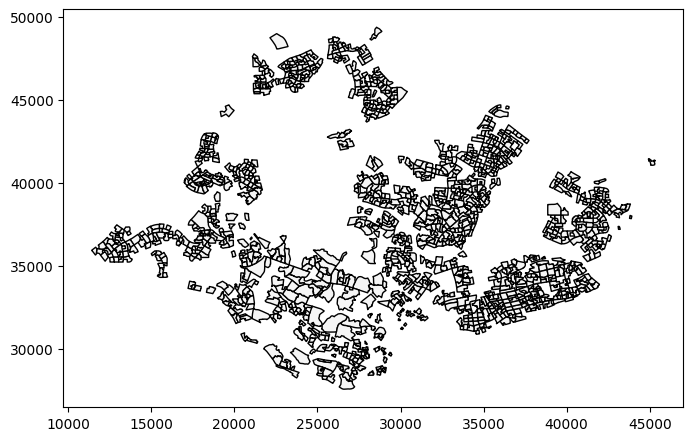

In [72]:
ax = sectors_df.plot(figsize =(8,8),color= 'whitesmoke', edgecolor = 'black', zorder =3)

<p></p>
<p style="font-size:20px;"> <b>Structural Data</b>

In [70]:
# Import structural data file
struct_filepath = '/Users/pranav/Documents/Dengue vs Covid/spattemp_sg_copy.csv'
struct = pd.read_csv(struct_filepath, sep = ',')

struct_df = struct.copy()
struct_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1261 non-null   object 
 1   NDVI_A      1261 non-null   float64
 2   X300m.P     1261 non-null   object 
 3   X500m_P     1261 non-null   object 
 4   V_Density   1261 non-null   object 
 5   A_HDB_H     1261 non-null   object 
 6   A_HDB_A     1261 non-null   object 
 7   a_HDB_P     1261 non-null   object 
 8   D_To_Drain  1261 non-null   float64
 9   length_D    1261 non-null   object 
 10  Forest_P    1261 non-null   object 
 11  Grass_P     1261 non-null   object 
 12  MVege_P     1261 non-null   object 
 13  Building_P  1261 non-null   object 
 14  RU_HDB      1261 non-null   int64  
 15  Condo_n     1261 non-null   int64  
 16  Landed_n    1261 non-null   int64  
dtypes: float64(2), int64(3), object(12)
memory usage: 167.6+ KB


In [ ]:
struct_df.rename(columns = {'Unnamed: 0' :'Sector_ID'}, inplace = True)
struct_df.set_index('Sector_ID',inplace =True)
struct_df= struct_df.apply(pd.to_numeric, errors = 'coerce')
struct_df.head()

<p></p>
<p style="font-size:20px;"> <b>Merging the Datasets</b>

In [ ]:
#Merge between case counts and shapefile
dengue_counts_df = dengue_data['Case_counts']
first_merge_df = sectors_df.merge(dengue_counts_df, left_index = True, right_index=True)
first_merge_df.head()

In [ ]:
#Merge between first_merge and struct_df
second_merge_df = first_merge_df.merge(struct_df, left_index = True, right_index = True)

combined_data = second_merge_df.copy()

In [ ]:
combined_data.info()

In [ ]:
combined_data.sample(5)

<ul style="list-style-type:none; text-align: center;">
    <li style="font-size:36px;"> <b>Exploratory Data Analysis</b></li>
</ul></p>

<p></p>
<p style="font-size:20px;"> <b>Case Counts</b>

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff


fig = ff.create_distplot( hist_data = [combined_data.Case_counts],
                         group_labels = ['Case Count'], 
                         show_curve = True,
                         rug_text = [combined_data['ROAD_NAME'],combined_data.index])



fig.update_layout(showlegend = False,
                  paper_bgcolor = 'rgb(243, 243, 243)',
                  plot_bgcolor = 'rgb(243, 243, 243)',
                  title_text = 'Distribution of Case Counts')

fig.update_yaxes(autorange = True)
fig.update_xaxes(autorange = True)
fig.show()


In [ ]:

fig = px.box(combined_data, x = 'Case_counts')
fig.update_layout(showlegend = False,
                  paper_bgcolor = 'rgb(243, 243, 243)',
                  plot_bgcolor = 'rgb(243, 243, 243)',
                  title_text = 'Boxplot of Case Counts')
fig.show()

In [ ]:
fig = px.box(combined_data, y = 'Case_counts', x= 'PremType')
fig.update_layout(showlegend = True,
                  paper_bgcolor = 'rgb(243, 243, 243)',
                  plot_bgcolor = 'rgb(243, 243, 243)',
                  title_text = 'Case counts by PremType')

fig.update_yaxes(autorange = True)
fig.update_xaxes(autorange = True)
fig.show()

In [ ]:
fig = px.scatter(combined_data,x ='NDVI_A', y ='Case_counts', color = 'PremType'    )

fig.update_layout(showlegend = True,
                  paper_bgcolor = 'rgb(243, 243, 243)',
                  plot_bgcolor = 'rgb(243, 243, 243)',
                  title_text = 'Case counts vs. NDVI')
fig.update_yaxes(autorange = True)
fig.update_xaxes(autorange = True)
fig.show()


In [ ]:
fig = px.scatter(combined_data,x ='D_To_Drain', y ='Case_counts', color = 'PremType'    )

fig.update_layout(showlegend = True,
                  paper_bgcolor = 'rgb(243, 243, 243)',
                  plot_bgcolor = 'rgb(243, 243, 243)',
                  title_text = 'Case counts vs. D_To_Drain')
fig.show()

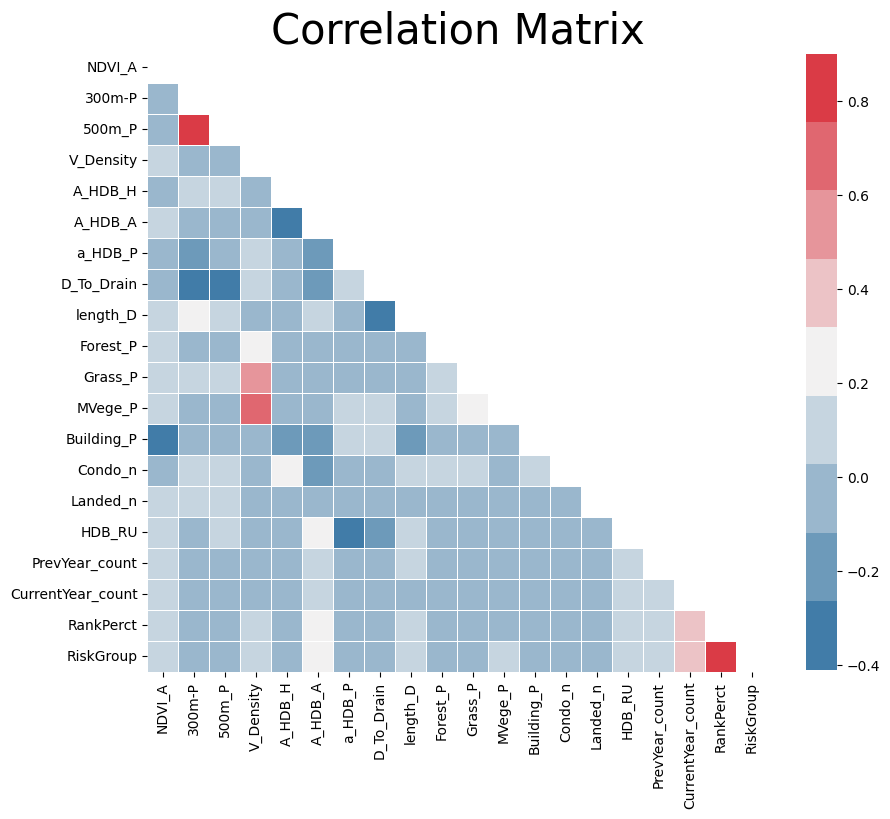

In [35]:
numeric_features = AggHDB_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

corr =  AggHDB_df[numeric_features].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(240, 10, n=9)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap=cmap, vmax =0.9,
            square=True, linewidths=.5,cbar_kws={"shrink": .8})
plt.title('Correlation Matrix', fontsize = 30)
plt.show()